<a href="https://colab.research.google.com/github/ShreyaSreeram/Datasci223-Final-Project/blob/main/Datascience_223_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Part 1: Descriptive Analysis

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd


In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Assuming you know the file name or it's the only file uploaded
# For example, 'heart_failure_clinical_records_dataset.csv'
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))
print(df.head())


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoki

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Display the summary of the dataframe including the data types and non-null counts
print(df.info())

# Describe the dataset with basic statistics
print(df.describe())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [5]:
#Unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


age: 47 unique values
anaemia: 2 unique values
creatinine_phosphokinase: 208 unique values
diabetes: 2 unique values
ejection_fraction: 17 unique values
high_blood_pressure: 2 unique values
platelets: 176 unique values
serum_creatinine: 40 unique values
serum_sodium: 27 unique values
sex: 2 unique values
smoking: 2 unique values
time: 148 unique values
DEATH_EVENT: 2 unique values


In [ ]:
import pandas as pd


# Assuming 'outcome' is your binary outcome variable where 1 = survived, 0 = dead.
# Replace 'categorical_feature' with the actual name of your categorical feature.
# You might have multiple categorical features; you'll need to repeat these steps for each.

# List of categorical features
categorical_features = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

for feature in categorical_features:
    # Calculate the total number of patients in each category
    total_patients = df[feature].value_counts().rename('total_patients')

    # Calculate the number of dead patients in each category
    dead_patients = df[df['outcome'] == 0][feature].value_counts().rename('dead_patients')

    # Calculate the number of patients who survived in each category
    survived_patients = df[df['outcome'] == 1][feature].value_counts().rename('survived_patients')

    # Combine the series into a DataFrame for the current feature
    temp_df = pd.concat([total_patients, dead_patients, survived_patients], axis=1).reset_index()
    temp_df.columns = ['Category Value', 'Total Patients', 'Dead Patients', 'Survived Patients']

    # Fill NaN values with 0
    temp_df = temp_df.fillna(0)

    # Convert counts to integers
    temp_df[['Total Patients', 'Dead Patients', 'Survived Patients']] = temp_df[['Total Patients', 'Dead Patients', 'Survived Patients']].astype(int)

    # Add a column to denote the current feature
    temp_df['Feature'] = feature

    # Append the results for the current feature to the results DataFrame
    results_df = pd.concat([results_df, temp_df], axis=0, ignore_index=True)

# Reorder the columns for better readability
results_df = results_df[['Feature', 'Category Value', 'Total Patients', 'Dead Patients', 'Survived Patients']]

print(results_df)


NameError: name 'plt' is not defined

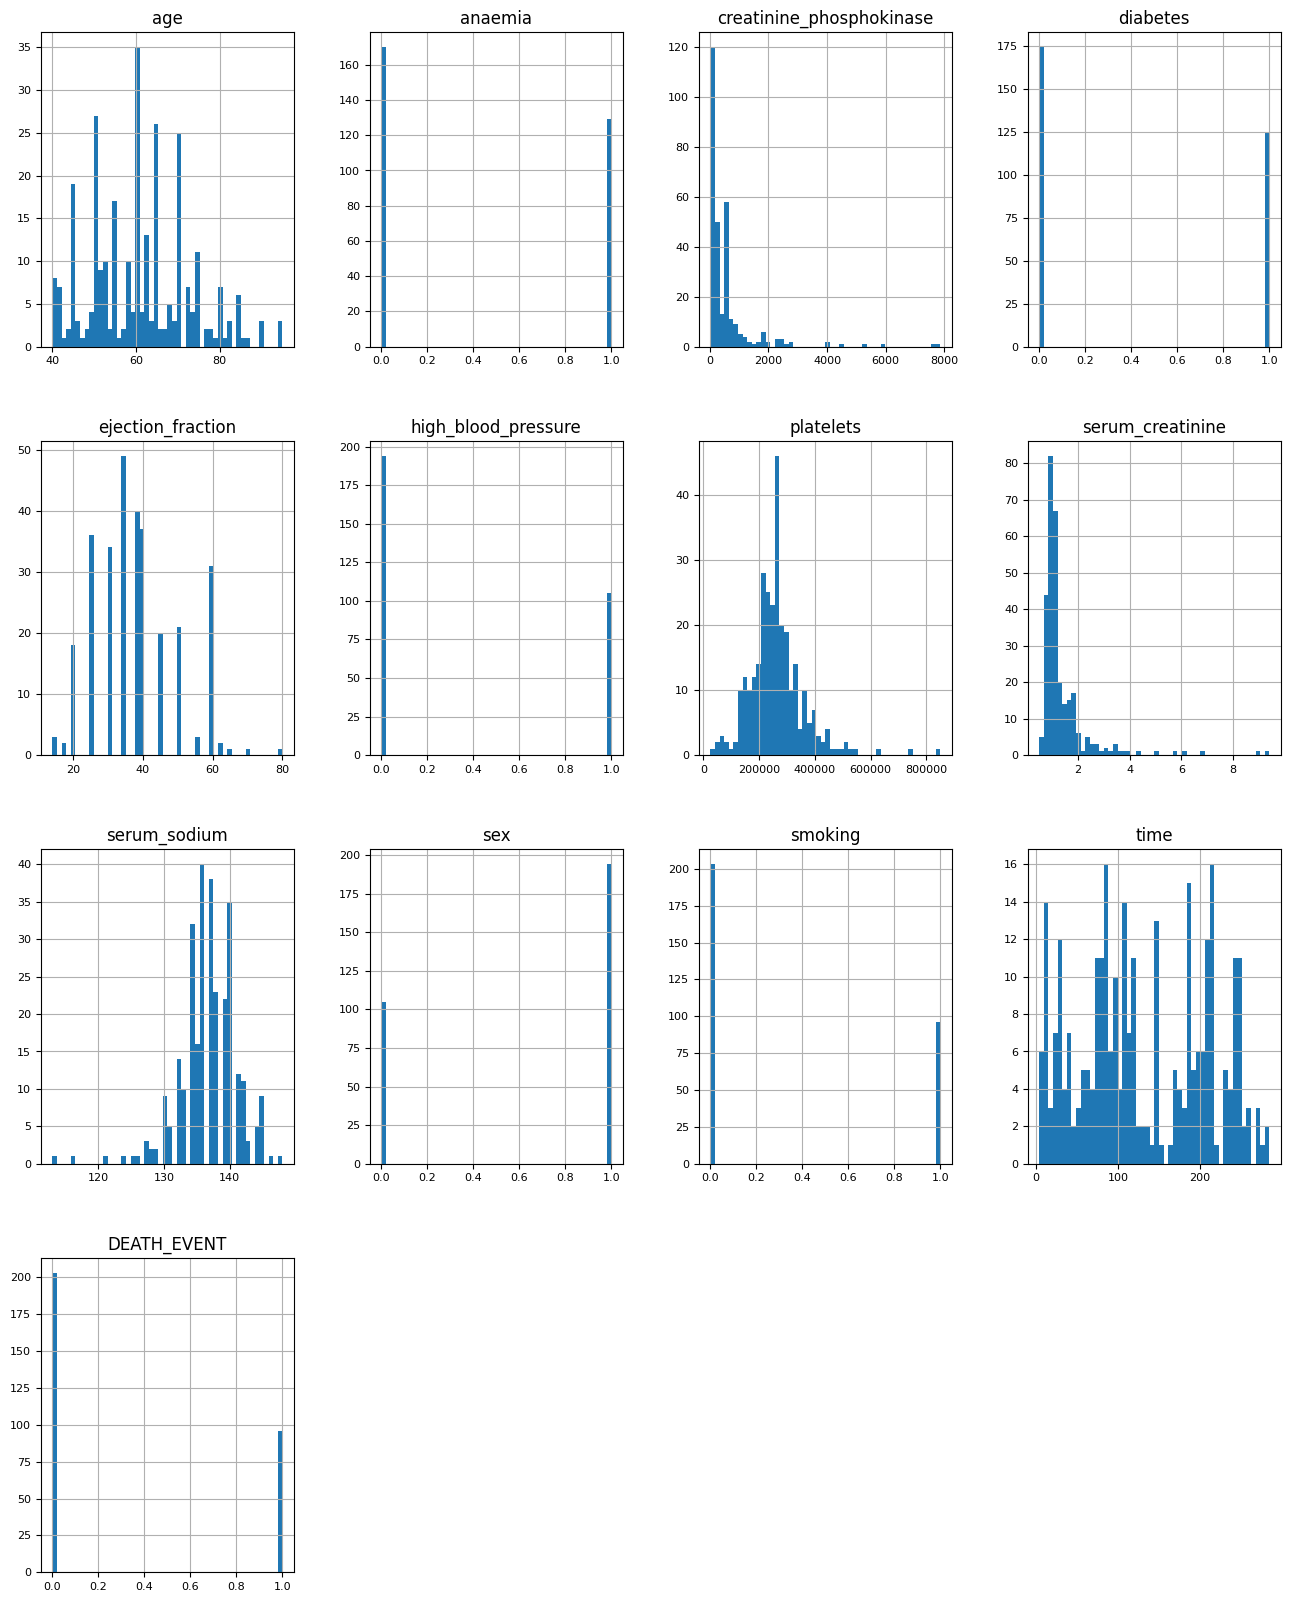

In [6]:
#Visualisations:

#Histograms for the numerical variables in the dataset:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()
